# 手写数字分类与全连接模型

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 预处理数据

In [2]:
# 导入torchvision库
from torchvision import datasets, transforms
# 定义一个转换函数，将图像转换为张量（Tensor）
transformation = transforms.Compose([
                                transforms.ToTensor(),  # transforms.ToTensor()会将图像转换为张量，并且将像素值缩放到0-1之间，并且将channel放在第一维度上
                                # transforms.Normalize((0.5,), (0.5,))  # transforms.Normalize()会将图像的像素值进行标准化，即将像素值减去均值，然后除以标准差
])

# 从datasets模块中导入MNIST数据集
# 训练集
train_ds = datasets.MNIST(
                          # 数据集的存储路径
                          'dataset/',
                          # 是否为训练集
                          train=True,
                          # 数据集的转换函数
                          transform=transformation,
                          # 是否下载数据集
                          download=True  
)
# 测试集
test_ds = datasets.MNIST(
                          'dataset/',
                          train=False,
                          transform=transformation,
                          download=True  
)

In [3]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=256)

In [12]:
imgs, labels = next(iter(train_dl))

In [13]:
imgs.shape 

torch.Size([64, 1, 28, 28])

### 在pytorch里面图片的表示形式： 【batch， channel， hight， width】

In [14]:
img = imgs[0]

In [17]:
img.shape

torch.Size([1, 28, 28])

In [18]:
img = img.numpy()

In [19]:
img = np.squeeze(img)

In [20]:
img.shape

(28, 28)

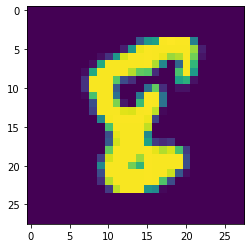

In [21]:
plt.imshow(img)

In [22]:
labels[0]

tensor(8)

In [23]:
labels[:10]

tensor([8, 8, 5, 8, 2, 9, 6, 2, 3, 3])

In [24]:
def imshow(img):
    npimg = img.numpy()
    npimg = np.squeeze(npimg)
    plt.imshow(npimg)

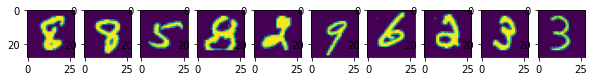

In [25]:
plt.figure(figsize=(10, 1))
for i, img in enumerate(imgs[:10]):
    plt.subplot(1, 10, i+1)
    imshow(img)

In [26]:
labels[:10]

tensor([8, 8, 5, 8, 2, 9, 6, 2, 3, 3])

# 创建模型

In [27]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.liner_1 = nn.Linear(28*28, 120)
        self.liner_2 = nn.Linear(120, 84)
        self.liner_3 = nn.Linear(84, 10)
    def forward(self, input):
        x = input.view(-1, 28*28)
        x = F.relu(self.liner_1(x))
        x = F.relu(self.liner_2(x))
        x = self.liner_3(x)
        return x

In [28]:
model = Model()

In [29]:
model

Model(
  (liner_1): Linear(in_features=784, out_features=120, bias=True)
  (liner_2): Linear(in_features=120, out_features=84, bias=True)
  (liner_3): Linear(in_features=84, out_features=10, bias=True)
)

In [35]:
loss_fn = torch.nn.CrossEntropyLoss()  # 损失函数

In [36]:
def fit(epoch, model, trainloader, testloader):
    correct = 0
    total = 0
    running_loss = 0
    for x, y in trainloader:
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
        
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / total
        
        
    test_correct = 0
    test_total = 0
    test_running_loss = 0 
    
    with torch.no_grad():
        for x, y in testloader:
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()
    
    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / test_total
    
        
    print('epoch: ', epoch, 
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3)
             )
        
    return epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc

In [37]:
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [38]:
epochs = 20

In [39]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc = fit(epoch,
                                                                 model,
                                                                 train_dl,
                                                                 test_dl)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

epoch:  0 loss：  0.005 accuracy: 0.904 test_loss：  0.001 test_accuracy: 0.952
epoch:  1 loss：  0.002 accuracy: 0.958 test_loss：  0.0 test_accuracy: 0.967
epoch:  2 loss：  0.001 accuracy: 0.971 test_loss：  0.0 test_accuracy: 0.97
epoch:  3 loss：  0.001 accuracy: 0.977 test_loss：  0.0 test_accuracy: 0.976
epoch:  4 loss：  0.001 accuracy: 0.982 test_loss：  0.0 test_accuracy: 0.977
epoch:  5 loss：  0.001 accuracy: 0.986 test_loss：  0.0 test_accuracy: 0.977
epoch:  6 loss：  0.001 accuracy: 0.988 test_loss：  0.0 test_accuracy: 0.977
epoch:  7 loss：  0.001 accuracy: 0.989 test_loss：  0.0 test_accuracy: 0.976


KeyboardInterrupt: 